In [1]:
import numpy as np
import pandas as pd

In [139]:
class MyLogisticRegression:
    def __init__(self, penalty = "l2", max_iter = 1000, l1_ratio = None, random_state = None, \
                 tol = 0.0001, C = 1.0, learning_rate = 0.05, fit_intercept = True):
        self.penalty = "l2"
        self.max_iter = 100
        
        if l1_ratio == None:
            self.l1_ratio = 0
        else:
            self.l1_ratio = l1_ratio
        self.random_state = random_state
        self.tol = tol
        self.C = C
        self.w = None
        self.get_data = None
        self.uniq_val = None
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        
    def stochastic_gradient_step(self, X, y, w):
        size, dim = np.shape(X)
        L_func = lambda X, w : 1 / (1 + np.exp(-X.dot(w)))
        grad = X.T.dot(L_func(X, w) - y)
        return grad
    
    
    def solver(self, X, y):
        rand_gen = np.random.RandomState(self.random_state)
        size, dim = np.shape(X)
        
        # случайная начальная инициализация
        w = rand_gen.rand(dim)
        weights_history = w
        

        for i in range(self.max_iter):
            rand_indices = rand_gen.choice(size, int(size * 0.5))
            grad = self.stochastic_gradient_step(X[rand_indices], y[rand_indices], w)

            assert type(grad) == np.ndarray, 'неверный тип'
            assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
            assert grad.shape[0] == len(w), 'длина вектора должна быть равной количеству весов'
            
            
            w -= self.learning_rate * grad / (i + 1)

            weights_history = np.vstack((weights_history, w))
        return w
    
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.w = self.solver(X, y)
        
        
    def computation(self, X, get_data = "prediction"):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        p1 = 1 / (1 + np.exp(-X.dot(self.w)))
        p0 = 1 - p1
        p_class = np.hstack((p1, p0))
        
        if get_data == "predict_proba":
            return  p_class
        
        if get_data == "predict":
            target_val = (p1 > 0.5).astype(np.int8)
            return  target_val
                    
        if get_data == "decision_function":
            return np.array(koef_expo)
                      

            
    def predict(self, X):
        predict_target_val = self.computation(X, "predict")
        return predict_target_val
    
    def predict_proba(self, X):
        pred_proba = self.computation(X, "predict_proba")
        return pred_proba
    
    def decision_function(self, X):
        decision_func = self.computation(X, "decision_function")
        return decision_func

In [140]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=600, noise=0.3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [141]:
my_logreg = MyLogisticRegression()
my_logreg.fit(X_train, y_train)
my_logreg.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int8)

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

accuracy_score(y_test, my_logreg.predict(X_test))
print(roc_auc_score(y_test, my_logreg.predict(X_test)))

0.8062937062937062


In [31]:
data = pd.read_csv("weatherAUS.csv")
X = data.iloc[:, 0:-2]
y = data.iloc[:, -1]

[1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 1 1 1 1]


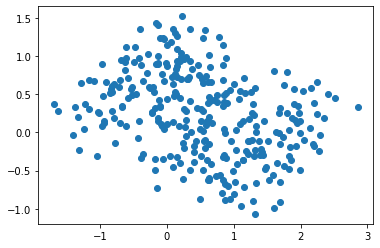

In [36]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.3)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
print(y)

In [68]:
class NaiveBayesClassifier:
    def __init__(self, distribution = "Normal"):
        self.distribution = distribution
        self.predict_probability = None
        self.target_value = None
        self.X = None
        self.y = None
        self.mean = None
        self.std = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y.astype(np.int8)
        
        
    def computation(self, X):
    # При вызове методов predict, predict_proba, kneighbors мы по-новой создаем данные контейнеры информации
    # это делается для того, чтобы при вызове методов с разными данными/
    #не происходило заполнение уже заполненных контейнеров 
        
        self.predict_probability = np.array([])
        self.target_value = np.array([])
        
        mean_val = lambda y_val:self.X[self.y==y_val].mean(axis=0)
        std_val = lambda y_val: self.X[self.y==y_val].std(axis=0)
        p_y = lambda y_val: np.size(self.y[self.y == y_val]) / np.size(self.y)
        
        
        if self.distribution == "Normal":
            prob = lambda x, y_val: np.exp(-np.power(x - mean_val(y_val), 2) \
                / (2 * np.power(std_val(y_val), 2))) / np.sqrt(2 * np.pi * np.power(std_val(y_val), 2))
        
        
        for elem in X:
            flag = np.array([0, 0], dtype = np.int8)
            
            for target in np.array([0, 1], dtype = np.int8):
                test_val = np.log(p_y(target)) + np.sum(np.log(prob(elem, target))) 

                if test_val > flag[1]:
                    flag[0] = target
                    flag[1] = test_val
            self.target_value = np.append(self.target_value, flag[0])
            self.predict_probability = np.append(self.target_value, np.exp(flag[1]))
       

    
    def predict(self, X):
        self.computation(X)
        return self.target_value
    
    def predict_probability(self, X):
        self.computation(X)
        return self.predict_probability


In [146]:
class NaiveBayesClassifier:
    def __init__(self, distribution = "Normal"):
        self.distribution = distribution
        self.predict_probability = None
        self.target_value = None
        self.p_y = None
        self.mean = None
        self.std = None
        self.std_X = None
        self.mean_X = None
    
    def fit(self, X, y):
        mean_0 = np.mean(X[y == 0])
        mean_1 = np.mean(X[y == 1])
        
        std_0 = np.std(X[y == 0])
        std_1 = np.std(X[y == 1])
        un_val, count_0 = np.unique(y, return_counts=True)

        self.mean = np.array([mean_0, mean_1])
        self.std = np.array([std_0, std_1])
        self.p_y = np.array([count_0[un_val == 0], count_0[un_val == 1]]) / np.shape(y)[0]
        self.mean_X = np.mean(X)
        self.std_X = np.std(X)

        
        
    def computation(self, X, get_val = "predict"):

        p_y = lambda y_val: np.size(self.y[self.y == y_val]) / np.size(self.y)
        
        
        if self.distribution == "Normal":
            p_X_y = lambda x, mean, std: np.exp(-np.power(x - mean, 2) \
                / (2 * np.power(std, 2))) / np.sqrt(2 * np.pi * np.power(std, 2))
        

        prob_0 = np.prod(p_X_y(X, self.mean[0], self.std[0]), axis = 1) * self.p_y[0]
        prob_1 = np.prod(p_X_y(X, self.mean[1], self.std[1]), axis = 1) * self.p_y[1]
        
        if get_val == "predict":
            return (prob_1 > prob_0).astype(np.int8)
        
        if get_val == "predict_proba":
            pred_proba = np.array([prob_0 , prob_1]) / np.prod(p_X_y(X, self.mean_X, self.std_X), axis=1)
            return pred_proba
            

    
    def predict(self, X): 
        return self.computation(X, "predict") 
    
    def predict_probability(self, X):
        return self.computation(X, "predict_proba")


In [147]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=600, noise=0.3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [148]:
MyBayes = NaiveBayesClassifier()
MyBayes.fit(X_train, y_train)
predict = MyBayes.predict(X_test)
accuracy_score(y_test, predict)

0.49166666666666664

In [ ]:
class NaiveBayesClassifier:
    def __init__(self, distribution = "Normal", random_state = None):
        self.distribution = distribution
        self.random_state = random_state
        self.p_y = None
        self.mean = None
        self.std = None
        self.std_X = None
        self.mean_X = None
        
    def stochastic_gradient_step:
        
        
    
    def fit(self, X, y):
        mean_0 = np.mean(X[y == 0])
        mean_1 = np.mean(X[y == 1])
        
        std_0 = np.std(X[y == 0])
        std_1 = np.std(X[y == 1])
        un_val, count_0 = np.unique(y, return_counts=True)

        self.mean = np.array([mean_0, mean_1])
        self.std = np.array([std_0, std_1])
        self.p_y = np.array([count_0[un_val == 0], count_0[un_val == 1]]) / np.shape(y)[0]
        self.mean_X = np.mean(X)
        self.std_X = np.std(X)

        
        
    def computation(self, X, get_val = "predict"):

        p_y = lambda y_val: np.size(self.y[self.y == y_val]) / np.size(self.y)
        
        
        if self.distribution == "Normal":
            p_X_y = lambda x, mean, std: np.exp(-np.power(x - mean, 2) \
                / (2 * np.power(std, 2))) / np.sqrt(2 * np.pi * np.power(std, 2))
        

        prob_0 = np.prod(p_X_y(X, self.mean[0], self.std[0]), axis = 1) * self.p_y[0]
        prob_1 = np.prod(p_X_y(X, self.mean[1], self.std[1]), axis = 1) * self.p_y[1]
        
        if get_val == "predict":
            return (prob_1 > prob_0).astype(np.int8)
        
        if get_val == "predict_proba":
            pred_proba = np.array([prob_0 , prob_1]) / np.prod(p_X_y(X, self.mean_X, self.std_X), axis=1)
            return pred_proba
            

    
    def predict(self, X): 
        return self.computation(X, "predict") 
    
    def predict_probability(self, X):
        return self.computation(X, "predict_proba")
